In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")


In [3]:
final = pd.read_csv("../data/final/final_data_per_day.csv").drop_duplicates(keep='first')
print(final.shape)
final.head()

(825, 24)


,date,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,...,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,IsBankHoliday,TotEnergyPerDay,HouseCount,AvgEnergyPerDay,month,day
0,2011-11-23,10.36,229.0,6.29,0.36,2.04,1027.12,10.36,8.06,0.93,...,3.81,10.36,2.18,0.94,0.0,90.385000,13,6.952692,11,23
1,2011-11-24,12.93,204.0,8.56,0.41,4.04,1027.22,12.93,10.64,0.89,...,8.56,12.93,7.01,0.97,0.0,213.412000,25,8.536480,11,24
2,2011-11-25,13.03,243.0,7.24,0.48,5.02,1024.47,12.27,12.38,0.79,...,7.46,12.27,4.84,0.01,0.0,303.993000,32,9.499781,11,25
3,2011-11-26,12.96,237.0,6.96,0.44,5.75,1025.80,12.96,13.07,0.81,...,7.01,12.96,4.69,0.05,1.0,420.976000,41,10.267707,11,26
4,2011-11-27,13.54,256.0,5.76,0.42,5.48,1021.11,13.54,13.08,0.72,...,4.47,13.54,2.94,0.08,1.0,444.883001,41,10.850805,11,27


In [4]:
final.rename(columns = {"AvgEnergyPerDay":"avg_energy"}, inplace=True)
final['date'] = pd.to_datetime(final['date'])

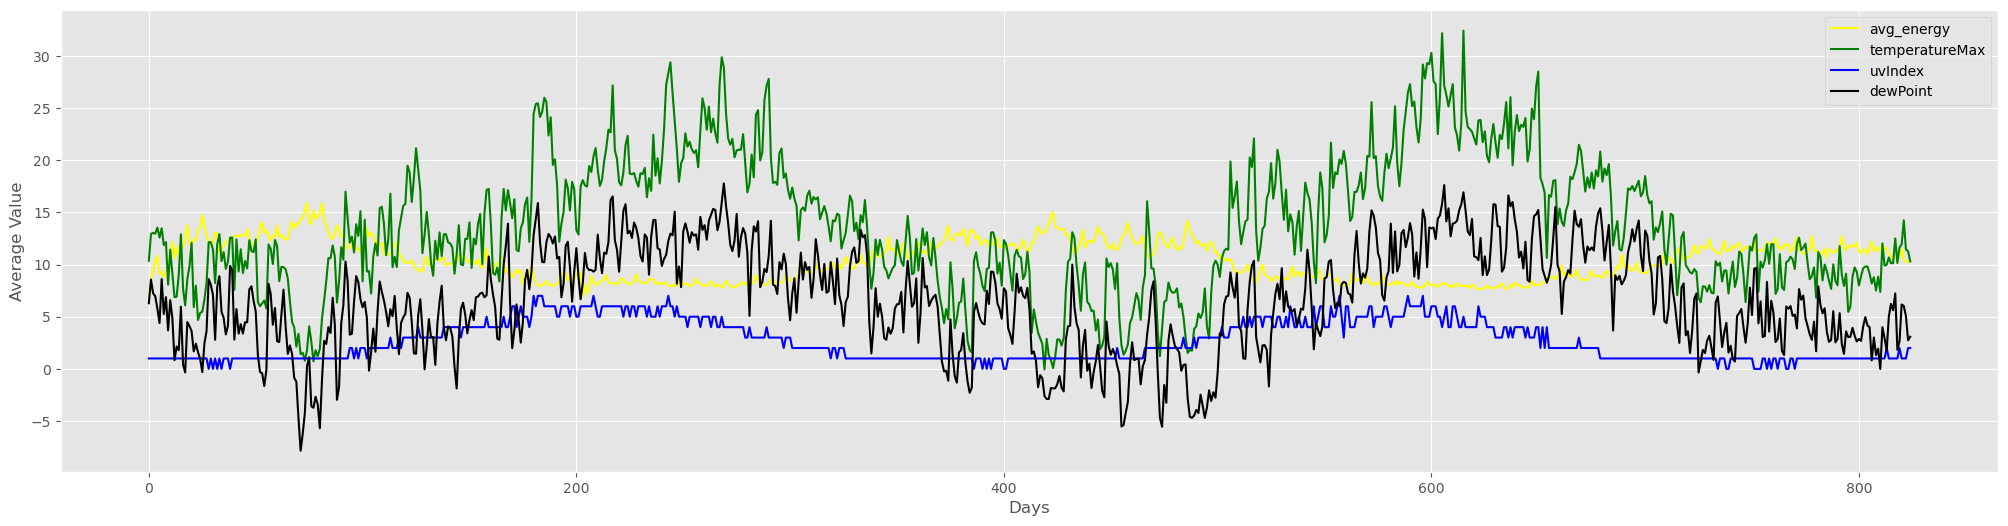

In [5]:
final.set_index('date')
fig, ax1 = plt.subplots(figsize=(25, 6))
ax1.plot( final["avg_energy"], color="yellow")
ax1.plot( final["temperatureMax"],  color="green")
ax1.plot(final["uvIndex"], color="blue")
ax1.plot(final["dewPoint"], "black")
ax1.set_ylabel("Average Value")
ax1.set_xlabel("Days")
ax1.legend(("avg_energy", "temperatureMax", "uvIndex", "dewPoint"))
plt.show()

In [6]:
final.corr()

,date,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,...,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,IsBankHoliday,TotEnergyPerDay,HouseCount,avg_energy,month,day
date,1.000000,0.054545,-0.023603,0.070358,-0.005375,0.053554,-0.209385,0.038124,-0.009068,-0.001503,...,0.072796,0.048423,0.067465,0.028542,-0.002288,0.708976,0.761881,-0.147658,0.101285,0.009017
temperatureMax,0.054545,1.000000,0.061190,0.865330,-0.332533,-0.154540,0.116844,0.986202,0.261225,-0.406835,...,0.896072,0.997838,0.911201,0.007085,-0.022552,-0.189267,0.171373,-0.865852,0.223594,0.057496
windBearing,-0.023603,0.061190,1.000000,0.090423,-0.082381,0.072214,-0.011702,0.070125,0.259234,0.021901,...,0.062552,0.056682,0.051418,0.038114,0.008177,-0.112187,-0.084794,-0.022492,0.167085,0.004163
dewPoint,0.070358,0.865330,0.090423,1.000000,-0.025048,-0.092774,-0.028716,0.870591,0.043482,0.053107,...,0.938765,0.862227,0.940441,-0.006186,-0.032999,-0.135566,0.187107,-0.771837,0.327627,0.059230
cloudCover,-0.005375,-0.332533,-0.082381,-0.025048,1.000000,0.170347,-0.097146,-0.308927,-0.332812,0.480058,...,-0.061194,-0.334435,-0.102108,-0.066226,-0.038839,0.124058,0.018714,0.251651,-0.106896,0.006600
windSpeed,0.053554,-0.154540,0.072214,-0.092774,0.170347,1.000000,-0.345830,-0.187432,0.280642,-0.040977,...,-0.022889,-0.162932,-0.133178,-0.022997,0.008933,0.041965,-0.024209,0.145529,-0.041951,0.047952
pressure,-0.209385,0.116844,-0.011702,-0.028716,-0.097146,-0.345830,1.000000,0.137121,-0.010135,-0.250061,...,0.006228,0.128167,0.057660,0.044596,0.007449,-0.270976,-0.224654,-0.028295,-0.040478,-0.004828
apparentTemperatureHigh,0.038124,0.986202,0.070125,0.870591,-0.308927,-0.187432,0.137121,1.000000,0.232823,-0.369068,...,0.890520,0.989487,0.913976,0.011212,-0.023780,-0.210766,0.150042,-0.866189,0.224258,0.059788
visibility,-0.009068,0.261225,0.259234,0.043482,-0.332812,0.280642,-0.010135,0.232823,1.000000,-0.579324,...,0.191730,0.259924,0.152172,0.061151,0.067433,-0.115911,-0.006541,-0.250141,0.112126,0.001168
humidity,-0.001503,-0.406835,0.021901,0.053107,0.480058,-0.040977,-0.250061,-0.369068,-0.579324,1.000000,...,-0.206502,-0.411468,-0.200373,-0.015395,-0.013283,0.130125,-0.024813,0.372676,0.153967,-0.016646


In [7]:
final.reset_index(inplace=True)
final = final[final["date"]!="2014-02-28"]
final.tail()

,index,date,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,...,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,IsBankHoliday,TotEnergyPerDay,HouseCount,avg_energy,month,day
820,820,2014-02-23,11.94,200.0,6.17,0.66,7.10,1010.37,11.94,12.33,...,8.67,11.94,5.53,0.78,1.0,57379.092995,4998,11.480411,2,23
821,821,2014-02-24,14.23,183.0,6.03,0.50,5.02,1005.19,14.23,13.00,...,7.99,14.23,5.52,0.82,0.0,51994.547004,4994,10.411403,2,24
822,822,2014-02-25,11.43,202.0,5.06,0.62,5.69,1000.65,10.31,12.09,...,6.79,10.31,3.89,0.86,0.0,51423.508001,4995,10.294997,2,25
823,823,2014-02-26,11.29,227.0,2.74,0.26,3.82,1012.73,11.29,13.00,...,4.17,11.29,1.67,0.90,0.0,50943.305995,4993,10.202945,2,26
824,824,2014-02-27,10.31,224.0,3.08,0.32,4.14,1007.02,10.31,12.04,...,3.93,10.31,1.41,0.93,0.0,51678.185998,4990,10.356350,2,27


In [8]:
# final['date'] = pd.to_datetime(final["date"])
# final["month"] = final["date"].dt.month
# final["day"] = final["date"].dt.day

In [9]:
from sklearn import preprocessing
pre = preprocessing.LabelEncoder()
pre.fit(final["date"])
final.head()

,index,date,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,...,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,IsBankHoliday,TotEnergyPerDay,HouseCount,avg_energy,month,day
0,0,2011-11-23,10.36,229.0,6.29,0.36,2.04,1027.12,10.36,8.06,...,3.81,10.36,2.18,0.94,0.0,90.385000,13,6.952692,11,23
1,1,2011-11-24,12.93,204.0,8.56,0.41,4.04,1027.22,12.93,10.64,...,8.56,12.93,7.01,0.97,0.0,213.412000,25,8.536480,11,24
2,2,2011-11-25,13.03,243.0,7.24,0.48,5.02,1024.47,12.27,12.38,...,7.46,12.27,4.84,0.01,0.0,303.993000,32,9.499781,11,25
3,3,2011-11-26,12.96,237.0,6.96,0.44,5.75,1025.80,12.96,13.07,...,7.01,12.96,4.69,0.05,1.0,420.976000,41,10.267707,11,26
4,4,2011-11-27,13.54,256.0,5.76,0.42,5.48,1021.11,13.54,13.08,...,4.47,13.54,2.94,0.08,1.0,444.883001,41,10.850805,11,27


In [10]:
final["datetime"] = pre.transform(final["date"])

In [11]:
print("maximum date :", max(final["date"]))
print("minimum date :", min(final["date"]))

maximum date : 2014-02-27 00:00:00
minimum date : 2011-11-23 00:00:00


In [12]:
final.columns

Index(['index', 'date', 'temperatureMax', 'windBearing', 'dewPoint',
       'cloudCover', 'windSpeed', 'pressure', 'apparentTemperatureHigh',
       'visibility', 'humidity', 'apparentTemperatureLow',
       'apparentTemperatureMax', 'uvIndex', 'temperatureLow', 'temperatureMin',
       'temperatureHigh', 'apparentTemperatureMin', 'moonPhase',
       'IsBankHoliday', 'TotEnergyPerDay', 'HouseCount', 'avg_energy', 'month',
       'day', 'datetime'],
      dtype='object')

In [13]:
final_corr = final.corr()

# Heatmap

<Axes: >

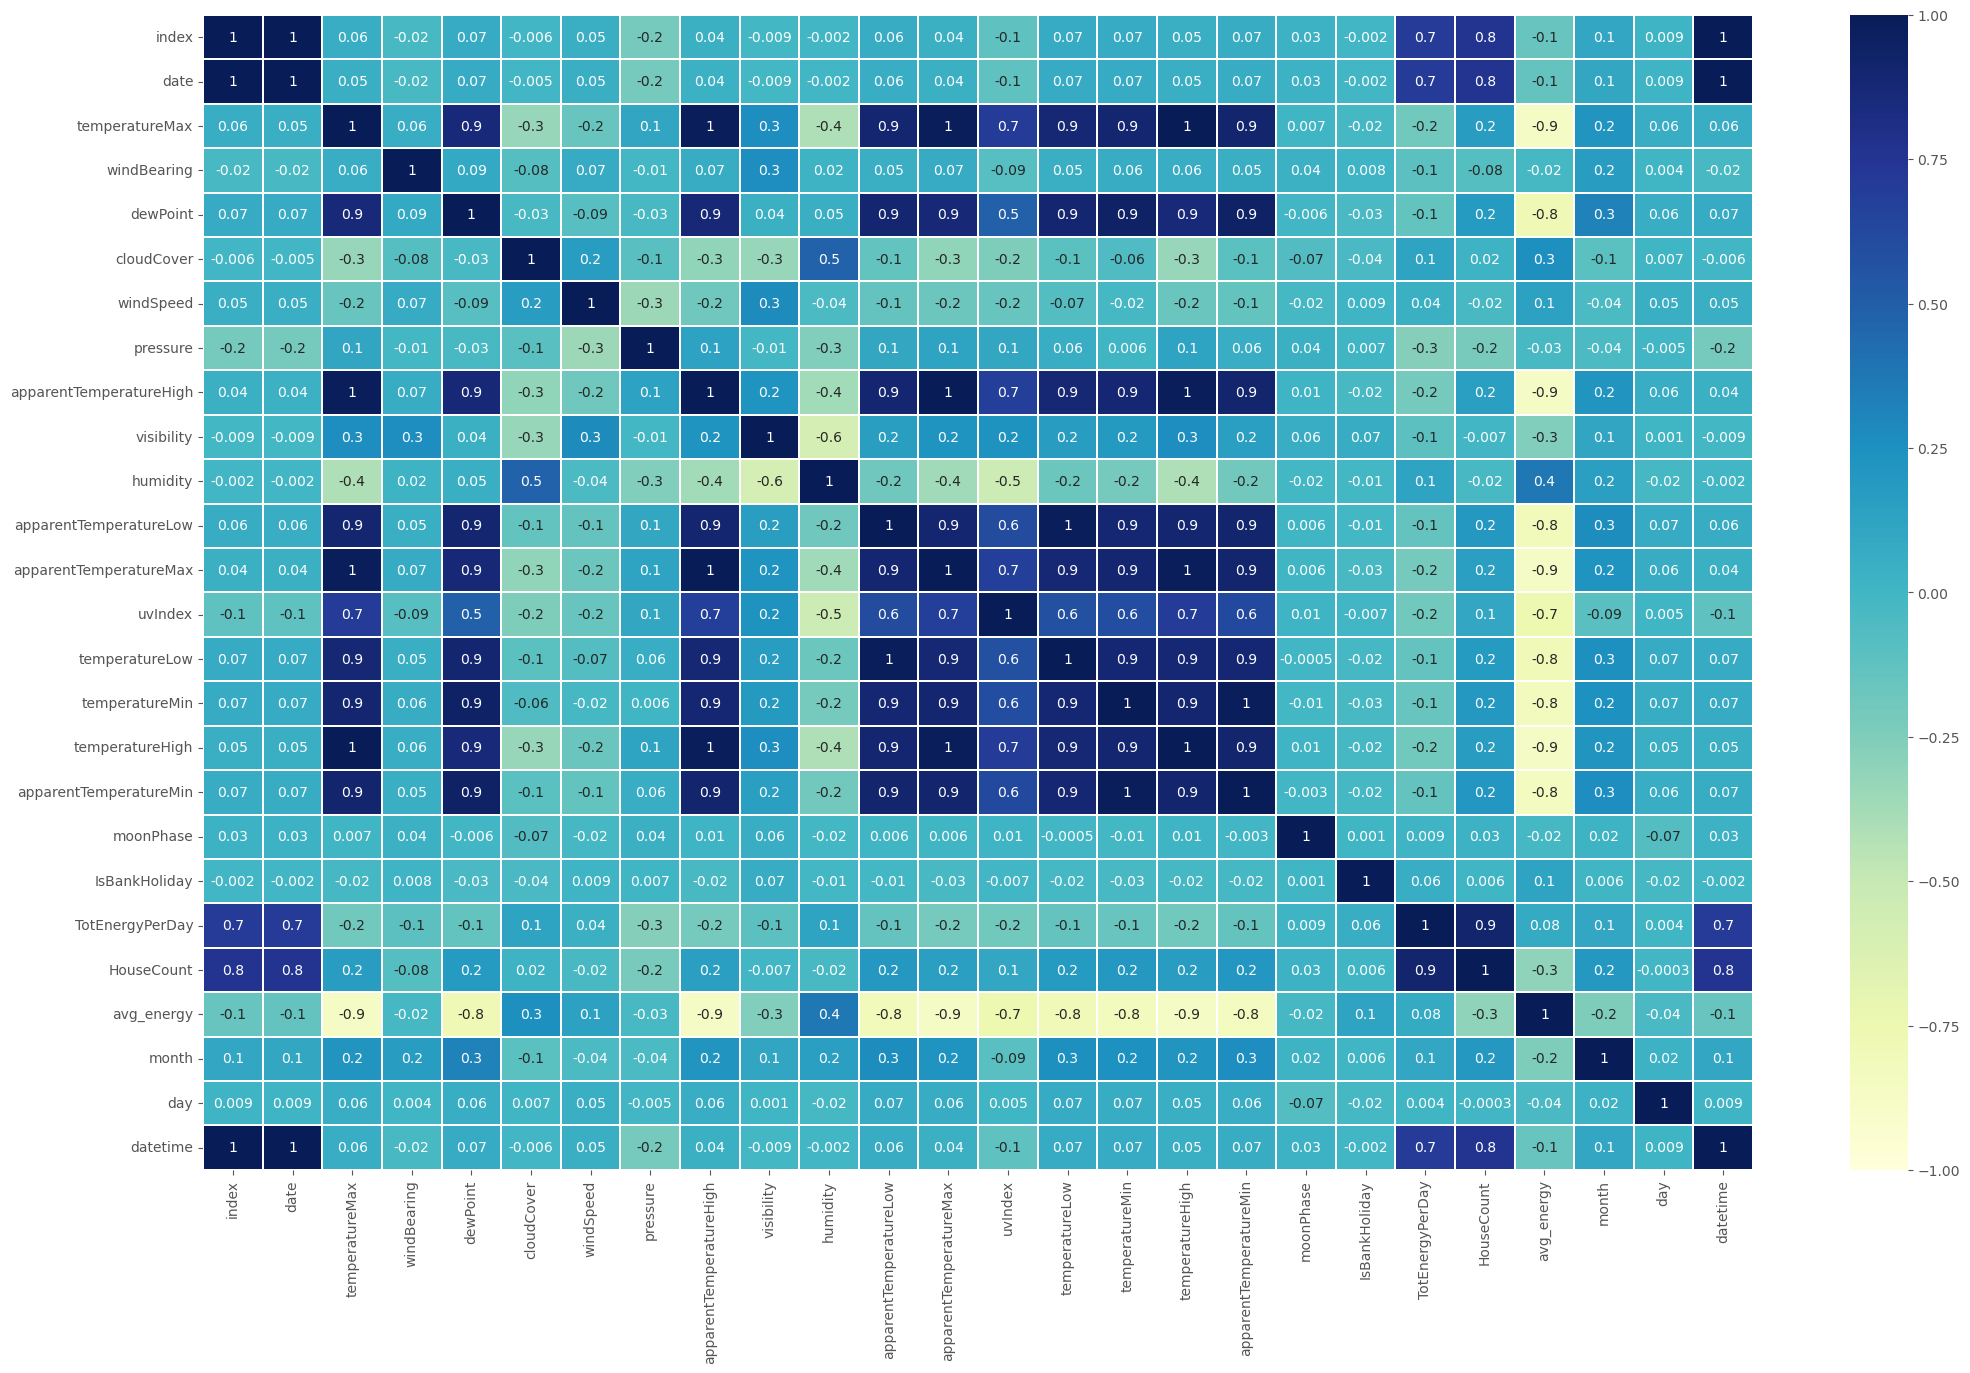

In [14]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(final_corr, cmap="YlGnBu", linewidths=0.3, annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, ax=ax)

In [15]:
final_corr.reset_index(inplace=True)

In [16]:
final_corr

,level_0,index,date,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,...,temperatureHigh,apparentTemperatureMin,moonPhase,IsBankHoliday,TotEnergyPerDay,HouseCount,avg_energy,month,day,datetime
0,index,1.000000,0.999999,0.055565,-0.023748,0.071287,-0.005536,0.053206,-0.209055,0.039146,...,0.049453,0.068519,0.028580,-0.002270,0.708975,0.762352,-0.148750,0.101824,0.009061,1.000000
1,date,0.999999,1.000000,0.054545,-0.023603,0.070358,-0.005375,0.053554,-0.209385,0.038124,...,0.048423,0.067465,0.028542,-0.002288,0.708976,0.761881,-0.147658,0.101285,0.009017,0.999999
2,temperatureMax,0.055565,0.054545,1.000000,0.061190,0.865330,-0.332533,-0.154540,0.116844,0.986202,...,0.997838,0.911201,0.007085,-0.022552,-0.189267,0.171373,-0.865852,0.223594,0.057496,0.055565
3,windBearing,-0.023748,-0.023603,0.061190,1.000000,0.090423,-0.082381,0.072214,-0.011702,0.070125,...,0.056682,0.051418,0.038114,0.008177,-0.112187,-0.084794,-0.022492,0.167085,0.004163,-0.023748
4,dewPoint,0.071287,0.070358,0.865330,0.090423,1.000000,-0.025048,-0.092774,-0.028716,0.870591,...,0.862227,0.940441,-0.006186,-0.032999,-0.135566,0.187107,-0.771837,0.327627,0.059230,0.071287
5,cloudCover,-0.005536,-0.005375,-0.332533,-0.082381,-0.025048,1.000000,0.170347,-0.097146,-0.308927,...,-0.334435,-0.102108,-0.066226,-0.038839,0.124058,0.018714,0.251651,-0.106896,0.006600,-0.005536
6,windSpeed,0.053206,0.053554,-0.154540,0.072214,-0.092774,0.170347,1.000000,-0.345830,-0.187432,...,-0.162932,-0.133178,-0.022997,0.008933,0.041965,-0.024209,0.145529,-0.041951,0.047952,0.053206
7,pressure,-0.209055,-0.209385,0.116844,-0.011702,-0.028716,-0.097146,-0.345830,1.000000,0.137121,...,0.128167,0.057660,0.044596,0.007449,-0.270976,-0.224654,-0.028295,-0.040478,-0.004828,-0.209055
8,apparentTemperatureHigh,0.039146,0.038124,0.986202,0.070125,0.870591,-0.308927,-0.187432,0.137121,1.000000,...,0.989487,0.913976,0.011212,-0.023780,-0.210766,0.150042,-0.866189,0.224258,0.059788,0.039146
9,visibility,-0.008956,-0.009068,0.261225,0.259234,0.043482,-0.332812,0.280642,-0.010135,0.232823,...,0.259924,0.152172,0.061151,0.067433,-0.115911,-0.006541,-0.250141,0.112126,0.001168,-0.008956


# Feature Selection 

In [17]:
feature_list = [j for i, j in zip(final_corr["avg_energy"], final_corr["level_0"]) if abs(i) > 0.3]
feature_list

['temperatureMax',
 'dewPoint',
 'apparentTemperatureHigh',
 'humidity',
 'apparentTemperatureLow',
 'apparentTemperatureMax',
 'uvIndex',
 'temperatureLow',
 'temperatureMin',
 'temperatureHigh',
 'apparentTemperatureMin',
 'avg_energy']

## Save File to csv

In [18]:
# final.to_csv("../data/final/final.csv", index=False)

In [19]:
final_columns = ['date','temperatureMax', 'dewPoint',
       'apparentTemperatureHigh', 'temperatureMin', 'temperatureLow', 
        'temperatureHigh', #'apparentTemperatureMin',
       'uvIndex', 'month', 'datetime' , 
       'avg_energy']

In [20]:
train = final[final["date"]<"2014-02-01"][final_columns]
test = final[final["date"]>="2014-02-01"][final_columns]
# train.to_csv("../data/final/train.csv", index=False)
# test.to_csv("../data/final/test.csv", index=False)

# Accuracy Function

In [21]:
def accuracy_function(y, y_pred):
    yhat_lower = y - 0.5
    yhat_upper = y + 0.5
    y_bin = [1]*len(y)
    y_pred_bin = np.where((y_pred >= yhat_lower) & (y_pred <= yhat_upper), 1, 0)

    acc_score = accuracy_score(y_bin, y_pred_bin)
    return acc_score

## Initiating out_df

In [22]:
out_df = pd.DataFrame()
error_df = pd.DataFrame(columns = ['model', 'mae', 'rmse', 'mape'])
accuracy_df = pd.DataFrame(columns = ['model', 'accuracy'])

# **Using prophet**

In [23]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot
from prophet.plot import plot_components
from sklearn.model_selection import train_test_split

In [24]:
train = pd.read_csv("../data/final/train.csv")
test = pd.read_csv("../data/final/test.csv")
test["date"] = pd.to_datetime(test["date"])
train["date"] = pd.to_datetime(train["date"])
train_df = train[["date", "avg_energy"]]
train_df.columns = ["ds", "y"]
test_df = test[["date", "avg_energy"]]
test_df.columns = ["ds", "y"]
test_df_ans = test_df.copy()
test_df["y"] = 0

## make model with Prophet by Facebook

In [25]:
train_df.shape, test_df.shape, test_df_ans.shape

((798, 2), (27, 2), (27, 2))

In [26]:
prophet_model = Prophet()
prophet_model.add_seasonality(name="monthly", period=180, fourier_order=5)
prophet_model.add_country_holidays(country_name='UK')
prophet_model.fit(train_df)

16:26:08 - cmdstanpy - INFO - Chain [1] start processing
16:26:08 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
prophet_model.train_holiday_names

0                         Good Friday
1                             May Day
2                 Spring Bank Holiday
3    Wedding of William and Catherine
4                      New Year's Day
5           New Year's Day (Observed)
6                       Christmas Day
7            Christmas Day (Observed)
8                          Boxing Day
9     Diamond Jubilee of Elizabeth II
dtype: object

In [28]:
forecast = prophet_model.predict(test_df)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Christmas Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-02-01,9.448249,10.903609,12.200931,9.448249,9.448249,0.0,0.0,0.0,0.0,...,0.122673,0.122673,0.122673,3.560988,3.560988,3.560988,0.0,0.0,0.0,11.556175
1,2014-02-02,9.444238,11.398886,12.696981,9.444238,9.444238,0.0,0.0,0.0,0.0,...,0.620953,0.620953,0.620953,3.686754,3.686754,3.686754,0.0,0.0,0.0,12.033680
2,2014-02-03,9.440227,10.713950,12.050638,9.440227,9.440227,0.0,0.0,0.0,0.0,...,-0.014201,-0.014201,-0.014201,3.809858,3.809858,3.809858,0.0,0.0,0.0,11.378108
3,2014-02-04,9.436216,10.560899,11.876332,9.436216,9.436216,0.0,0.0,0.0,0.0,...,-0.147727,-0.147727,-0.147727,3.930000,3.930000,3.930000,0.0,0.0,0.0,11.224855
4,2014-02-05,9.432205,10.484003,11.789244,9.432205,9.432205,0.0,0.0,0.0,0.0,...,-0.209120,-0.209120,-0.209120,4.046889,4.046889,4.046889,0.0,0.0,0.0,11.144751


In [29]:
out_df["prophet"] = forecast["yhat"]

### Accuracy Score

In [30]:
accuracy_prophet = accuracy_function(test_df_ans['y'], forecast["yhat"])
accuracy_prophet = round(accuracy_prophet*100, 3)
print("Accuracy Score for prophet: ", accuracy_prophet, "%")

Accuracy Score for prophet:  62.963 %


In [31]:
accuracy_df.loc[len(accuracy_df)] = {'model': 'prophet', 'accuracy': accuracy_prophet}

In [32]:
accuracy_df.head()

,model,accuracy
0,prophet,62.963


### Mean Square Error

In [33]:
mse_p = mean_squared_error(test_df_ans['y'], forecast["yhat"])
print('Test Score: %.2f MSE' % (mse_p))

Test Score: 0.26 MSE


### Mean Absolute Error

In [34]:
mae_p = mean_absolute_error(test_df_ans['y'], forecast["yhat"])
print('Test Score: %.2f MAE' % (mae_p))

Test Score: 0.42 MAE


### Mean Absolute Percentage Error

In [35]:
mape_p = mean_absolute_percentage_error(test_df_ans['y'], forecast["yhat"])
print('Test Score: %.2f MAPE' % (mape_p))

Test Score: 0.04 MAPE


In [36]:
error_df.loc[len(error_df)] = {'model': 'prophet', 'mae': mae_p, 'rmse': np.sqrt(mse_p), 'mape': mape_p}


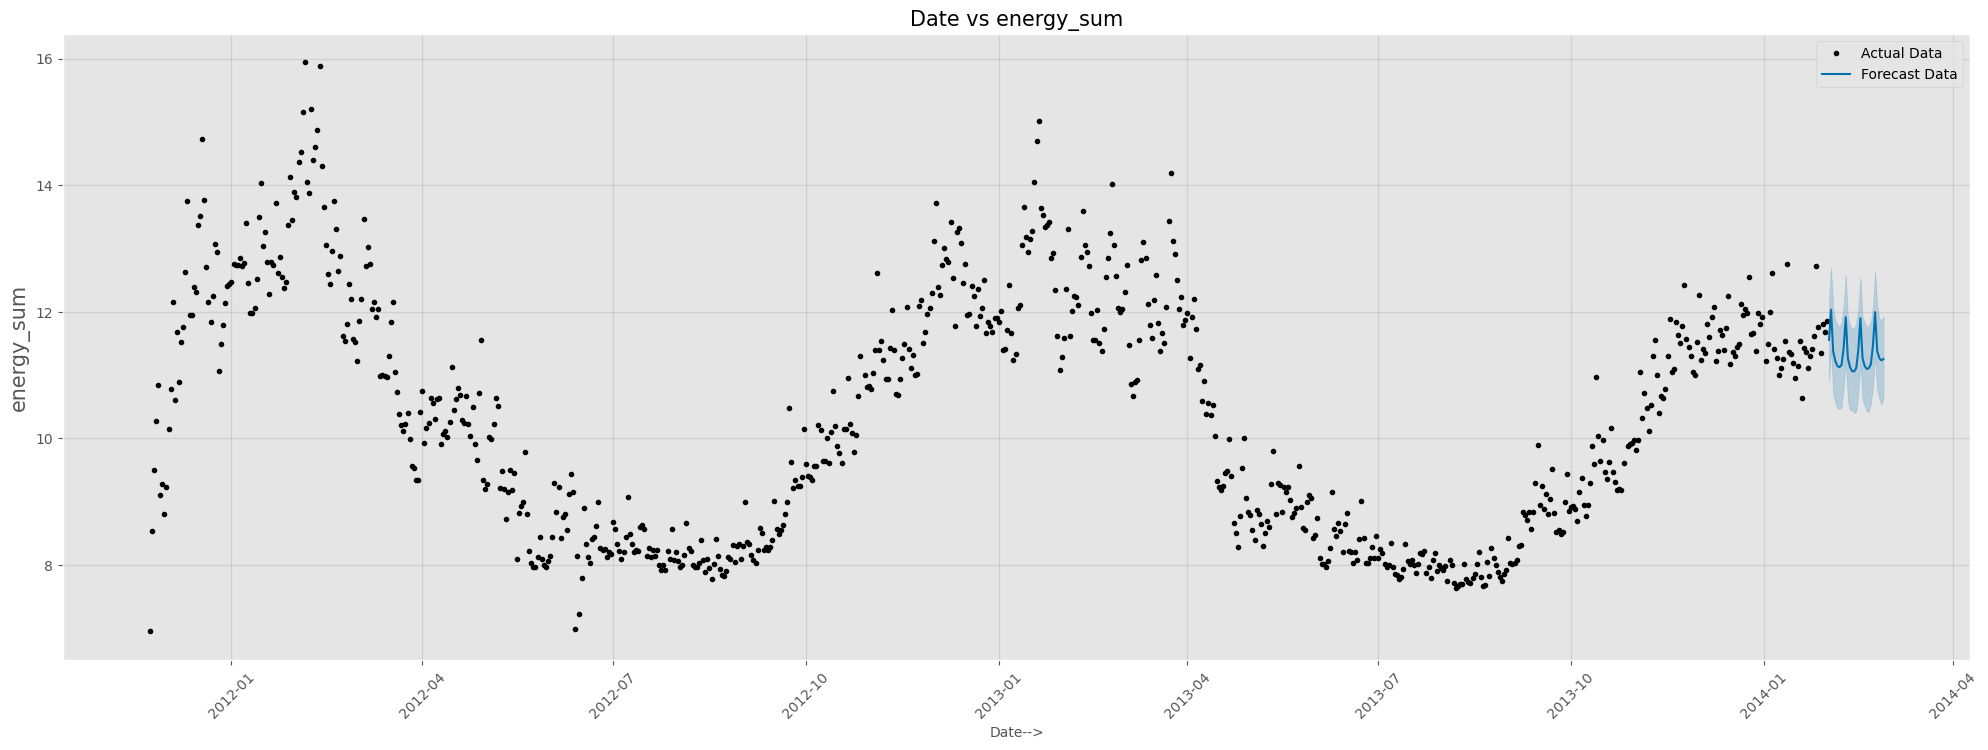

In [37]:
fig = plot(prophet_model, forecast, figsize=(20, 7))
ax = fig.gca()
ax.set_title("Date vs energy_sum", size=15)
ax.set_xlabel("Date-->", size=10)
ax.set_ylabel("energy_sum", size=15)
ax.tick_params(axis="x", labelsize=10, rotation=45)
ax.tick_params(axis="y", labelsize=10)
plt.legend(["Actual Data", "Forecast Data"])

Text(0.5, 1.02, 'Prophet Model Components')

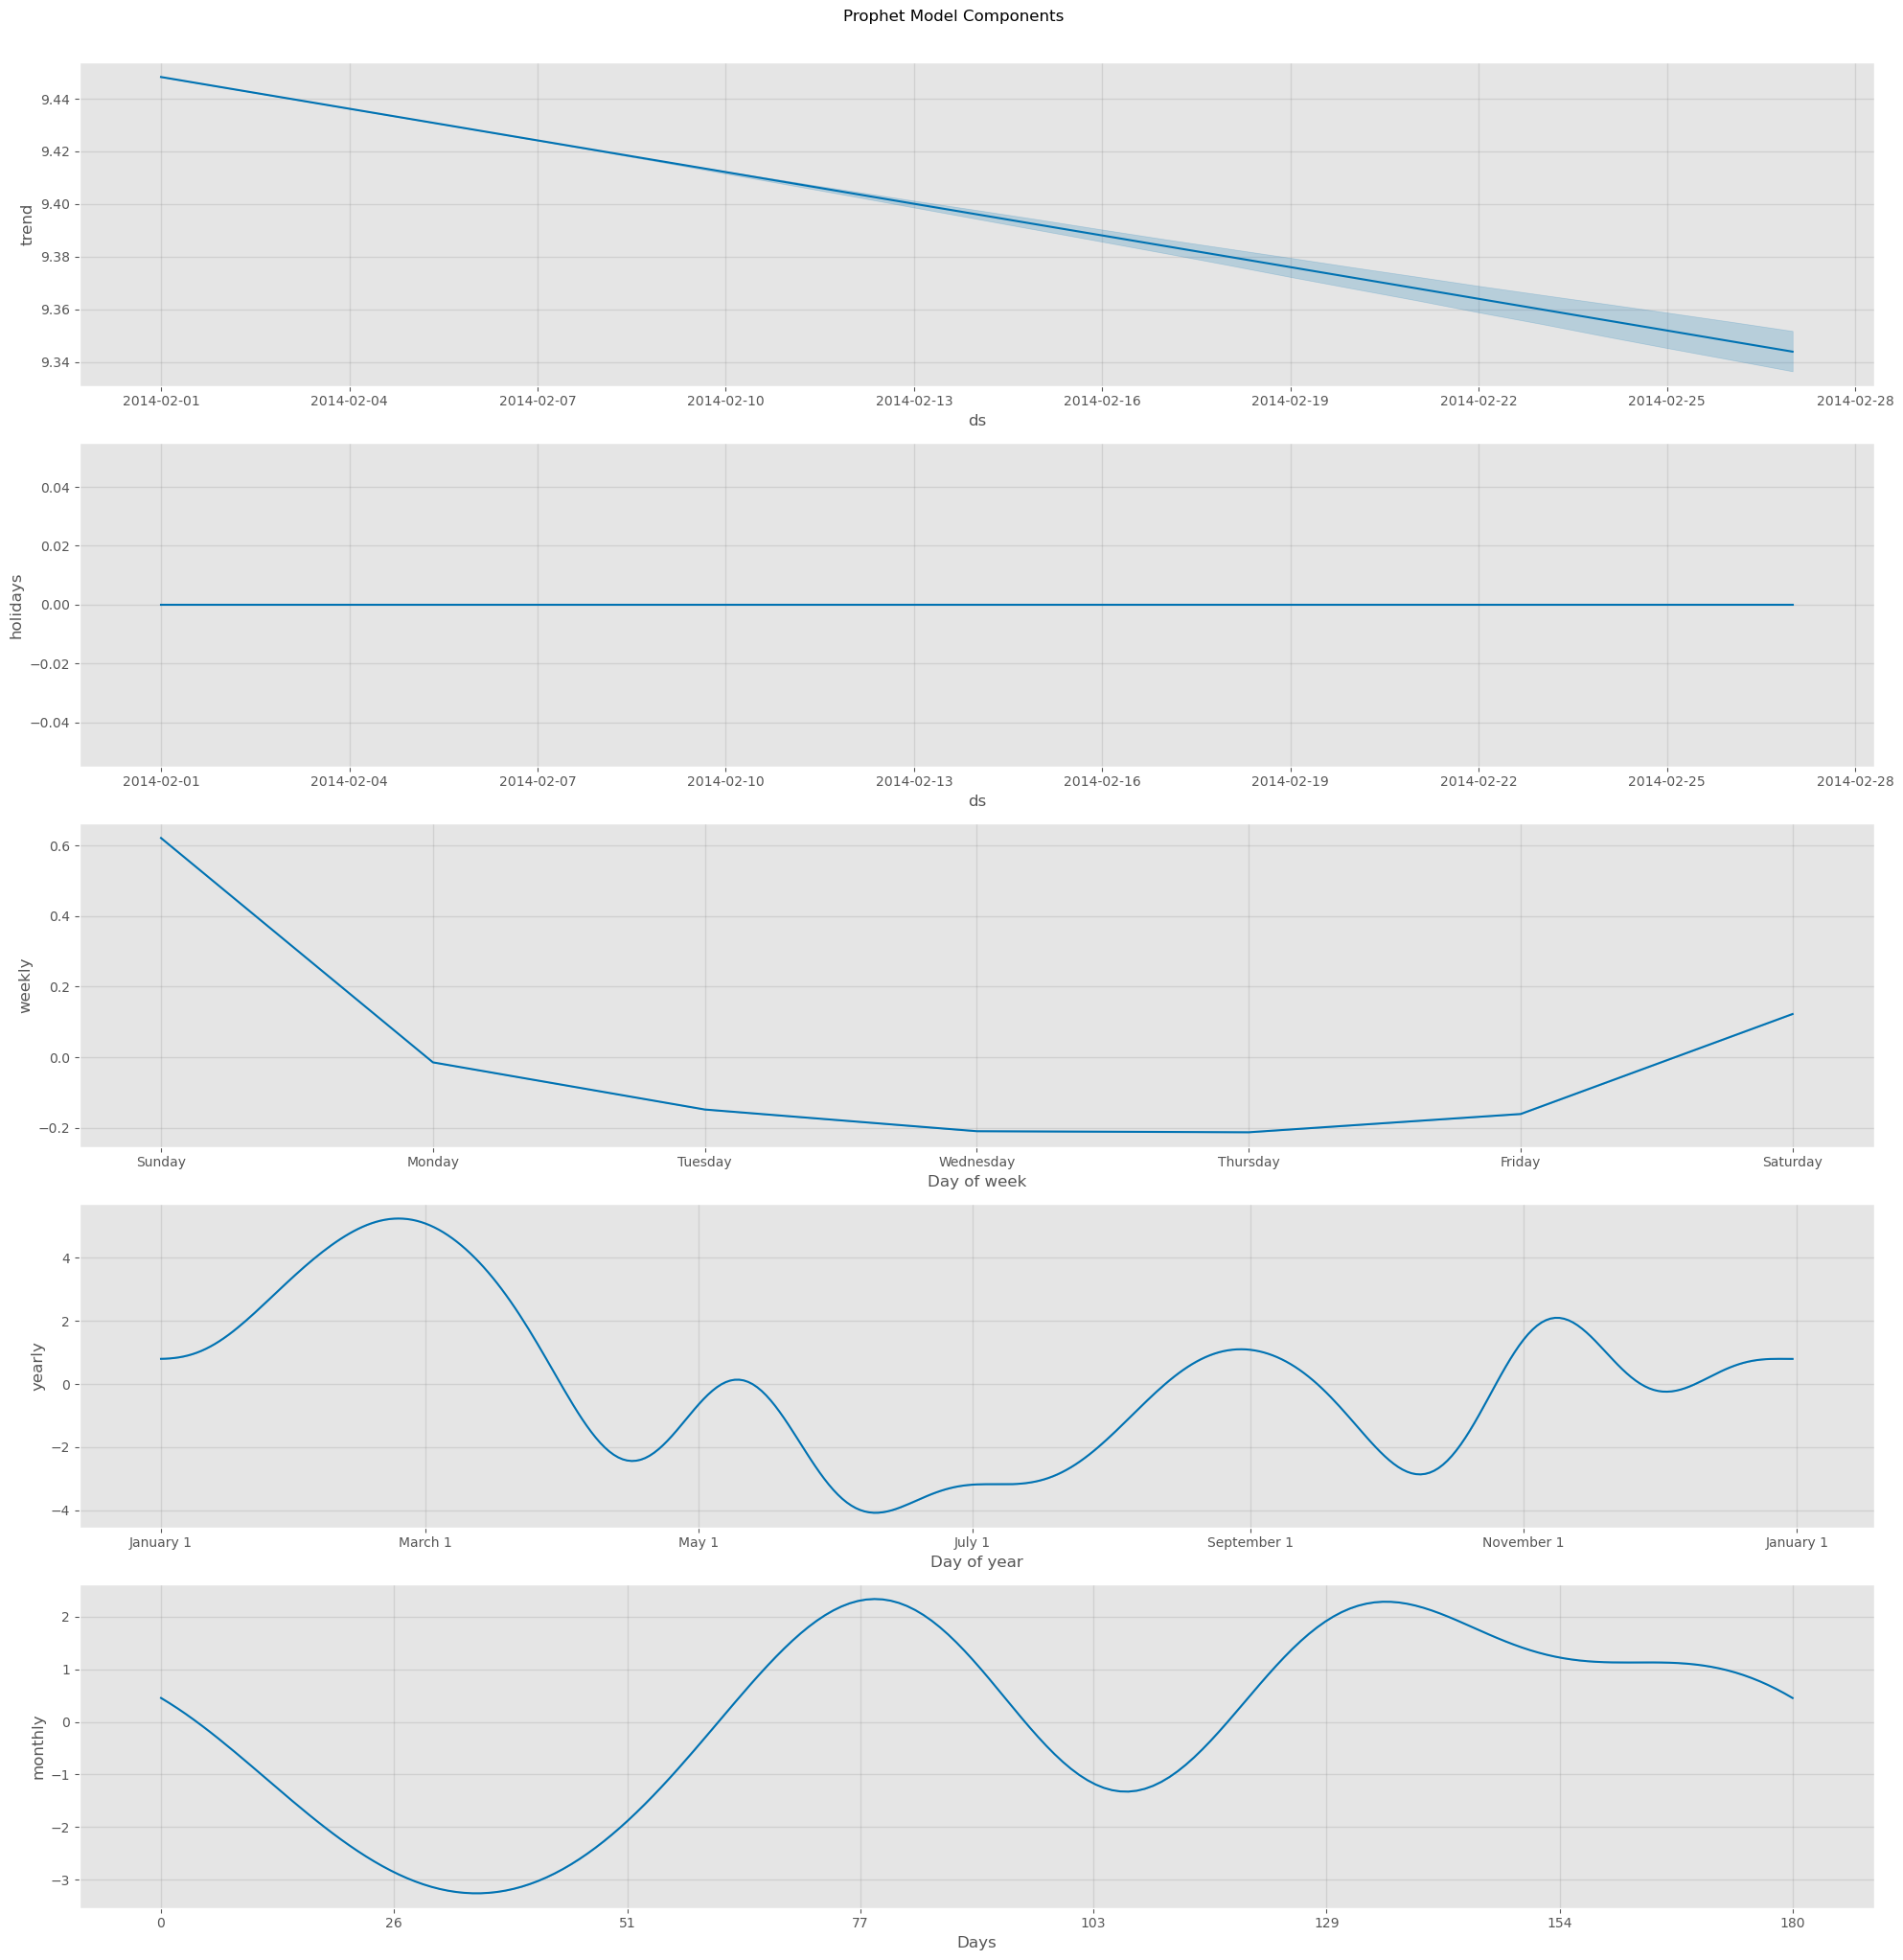

In [38]:
fig = prophet_model.plot_components(forecast, figsize = (20, 20))
plt.suptitle("Prophet Model Components", y=1.02) 

### Anlysis with cross_validation

In [39]:
df_cv = cross_validation(prophet_model, horizon="60 days")
df_cv.head()

  0%|          | 0/13 [00:00<?, ?it/s]

16:26:13 - cmdstanpy - INFO - Chain [1] start processing
16:26:13 - cmdstanpy - INFO - Chain [1] done processing
16:26:14 - cmdstanpy - INFO - Chain [1] start processing
16:26:14 - cmdstanpy - INFO - Chain [1] done processing
16:26:15 - cmdstanpy - INFO - Chain [1] start processing
16:26:15 - cmdstanpy - INFO - Chain [1] done processing
16:26:15 - cmdstanpy - INFO - Chain [1] start processing
16:26:16 - cmdstanpy - INFO - Chain [1] done processing
16:26:16 - cmdstanpy - INFO - Chain [1] start processing
16:26:16 - cmdstanpy - INFO - Chain [1] done processing
16:26:17 - cmdstanpy - INFO - Chain [1] start processing
16:26:17 - cmdstanpy - INFO - Chain [1] done processing
16:26:17 - cmdstanpy - INFO - Chain [1] start processing
16:26:18 - cmdstanpy - INFO - Chain [1] done processing
16:26:18 - cmdstanpy - INFO - Chain [1] start processing
16:26:18 - cmdstanpy - INFO - Chain [1] done processing
16:26:19 - cmdstanpy - INFO - Chain [1] start processing
16:26:19 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-12-08,13.254548,12.715350,13.738262,12.786987,2012-12-07
1,2012-12-09,13.896121,13.372172,14.380464,13.418991,2012-12-07
2,2012-12-10,13.163302,12.679112,13.681971,12.528336,2012-12-07
3,2012-12-11,12.975984,12.468859,13.493475,11.774059,2012-12-07
4,2012-12-12,12.821816,12.316376,13.342697,13.263261,2012-12-07


In [40]:
df_cv.shape

(776, 6)

### With performance_metrics, we can visualize the score

In [41]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,0.560260,0.748505,0.584887,0.058109,0.047877,0.059352,0.665335
1,7 days,0.700853,0.837170,0.659745,0.065107,0.050682,0.067100,0.625375
2,8 days,0.820184,0.905640,0.710282,0.069887,0.055214,0.072625,0.562438
3,9 days,0.927341,0.962985,0.767085,0.075688,0.061559,0.078820,0.499500
4,10 days,1.071888,1.035320,0.830700,0.082009,0.066845,0.085619,0.459540


In [42]:
forecast["ds"].shape, forecast["yhat"].shape

((27,), (27,))

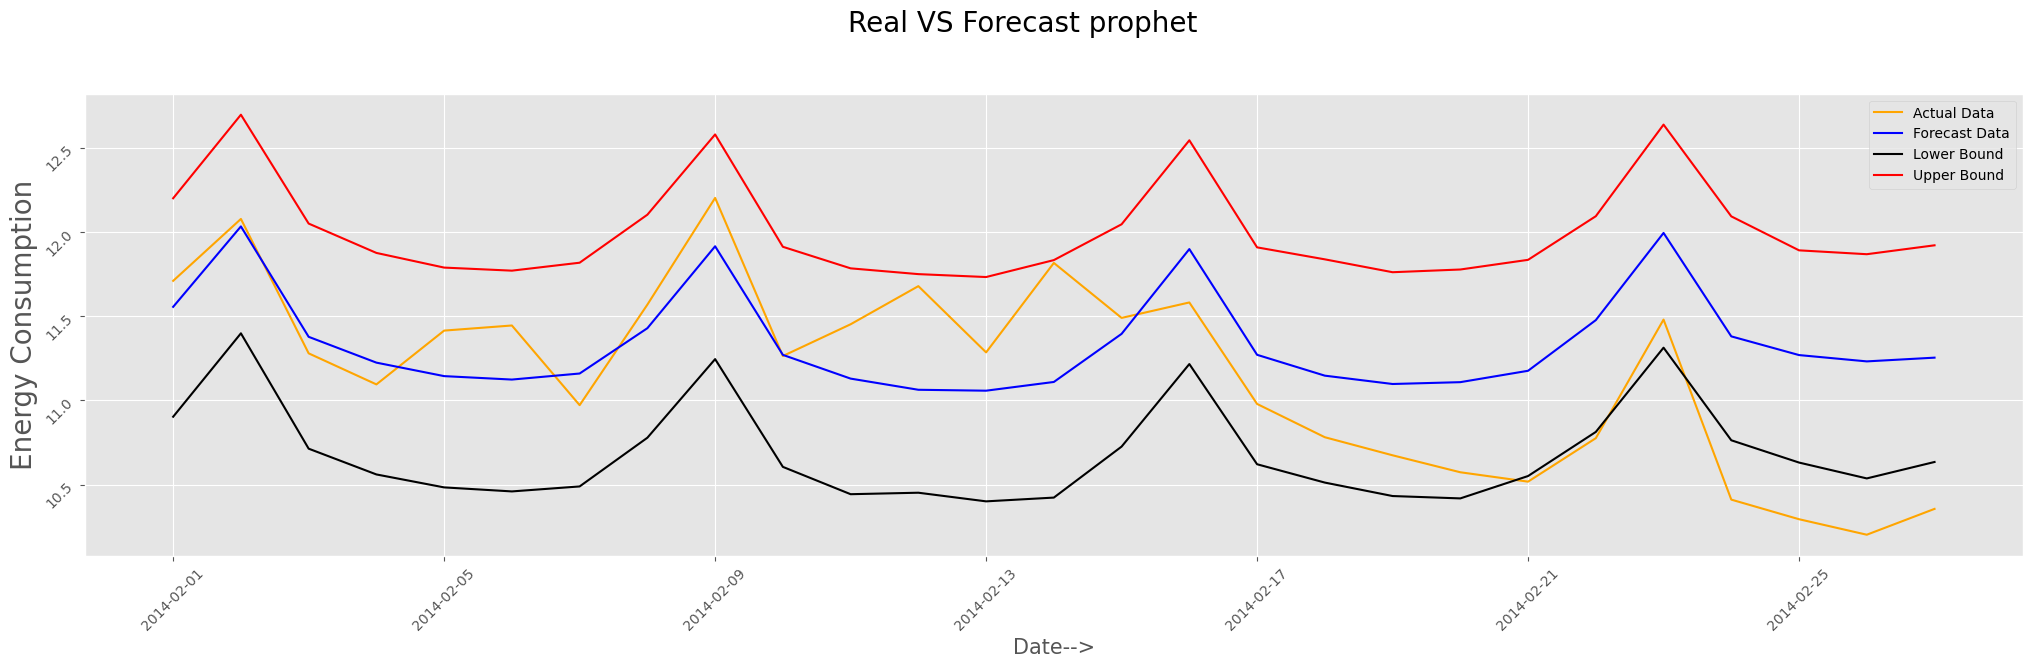

In [43]:
fig, ax1 = plt.subplots(figsize=(25, 6)) 
ax1.plot(test_df_ans["ds"], test_df_ans["y"], color="orange", label = "Actual Data")
ax1.plot(forecast["ds"], forecast["yhat"], color="blue", label = "Forecast Data")
ax1.plot(forecast["ds"], forecast["yhat_lower"], color="black", label = "Lower Bound")
ax1.plot(forecast["ds"], forecast["yhat_upper"], color="red", label = "Upper Bound")
ax1.legend(("y", "yhat_lower", "yhat_upper"))
ax1.set_xlabel("Date-->", size=15)
ax1.set_ylabel("Energy Consumption", size=20)

ax1.tick_params(rotation=45, labelsize=10)
ax1.legend(fontsize = 10)
plt.suptitle("Real VS Forecast prophet", y=1.02, fontsize=20)
plt.show()

## Future Prediction for next 1 year

In [44]:
future_1yr = prophet_model.make_future_dataframe(periods=365)
future_1yr.tail()

,ds
1158,2015-01-27
1159,2015-01-28
1160,2015-01-29
1161,2015-01-30
1162,2015-01-31


In [45]:
forecast_1yr = prophet_model.predict(future_1yr)
forecast_1yr.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Christmas Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-11-23,9.836036,8.856648,10.170251,9.836036,9.836036,0.0,0.0,0.0,0.0,...,-0.209120,-0.209120,-0.209120,0.541718,0.541718,0.541718,0.0,0.0,0.0,9.499704
1,2011-11-24,9.843026,8.846665,10.152098,9.843026,9.843026,0.0,0.0,0.0,0.0,...,-0.212150,-0.212150,-0.212150,0.404943,0.404943,0.404943,0.0,0.0,0.0,9.534749
2,2011-11-25,9.850017,8.967218,10.334914,9.850017,9.850017,0.0,0.0,0.0,0.0,...,-0.160427,-0.160427,-0.160427,0.277846,0.277846,0.277846,0.0,0.0,0.0,9.646584
3,2011-11-26,9.857008,9.391303,10.628392,9.857008,9.857008,0.0,0.0,0.0,0.0,...,0.122673,0.122673,0.122673,0.162200,0.162200,0.162200,0.0,0.0,0.0,10.011018
4,2011-11-27,9.863999,9.960800,11.271167,9.863999,9.863999,0.0,0.0,0.0,0.0,...,0.620953,0.620953,0.620953,0.059487,0.059487,0.059487,0.0,0.0,0.0,10.610649


Text(0.5, 0.98, 'Prophet 1 Year Forecast')

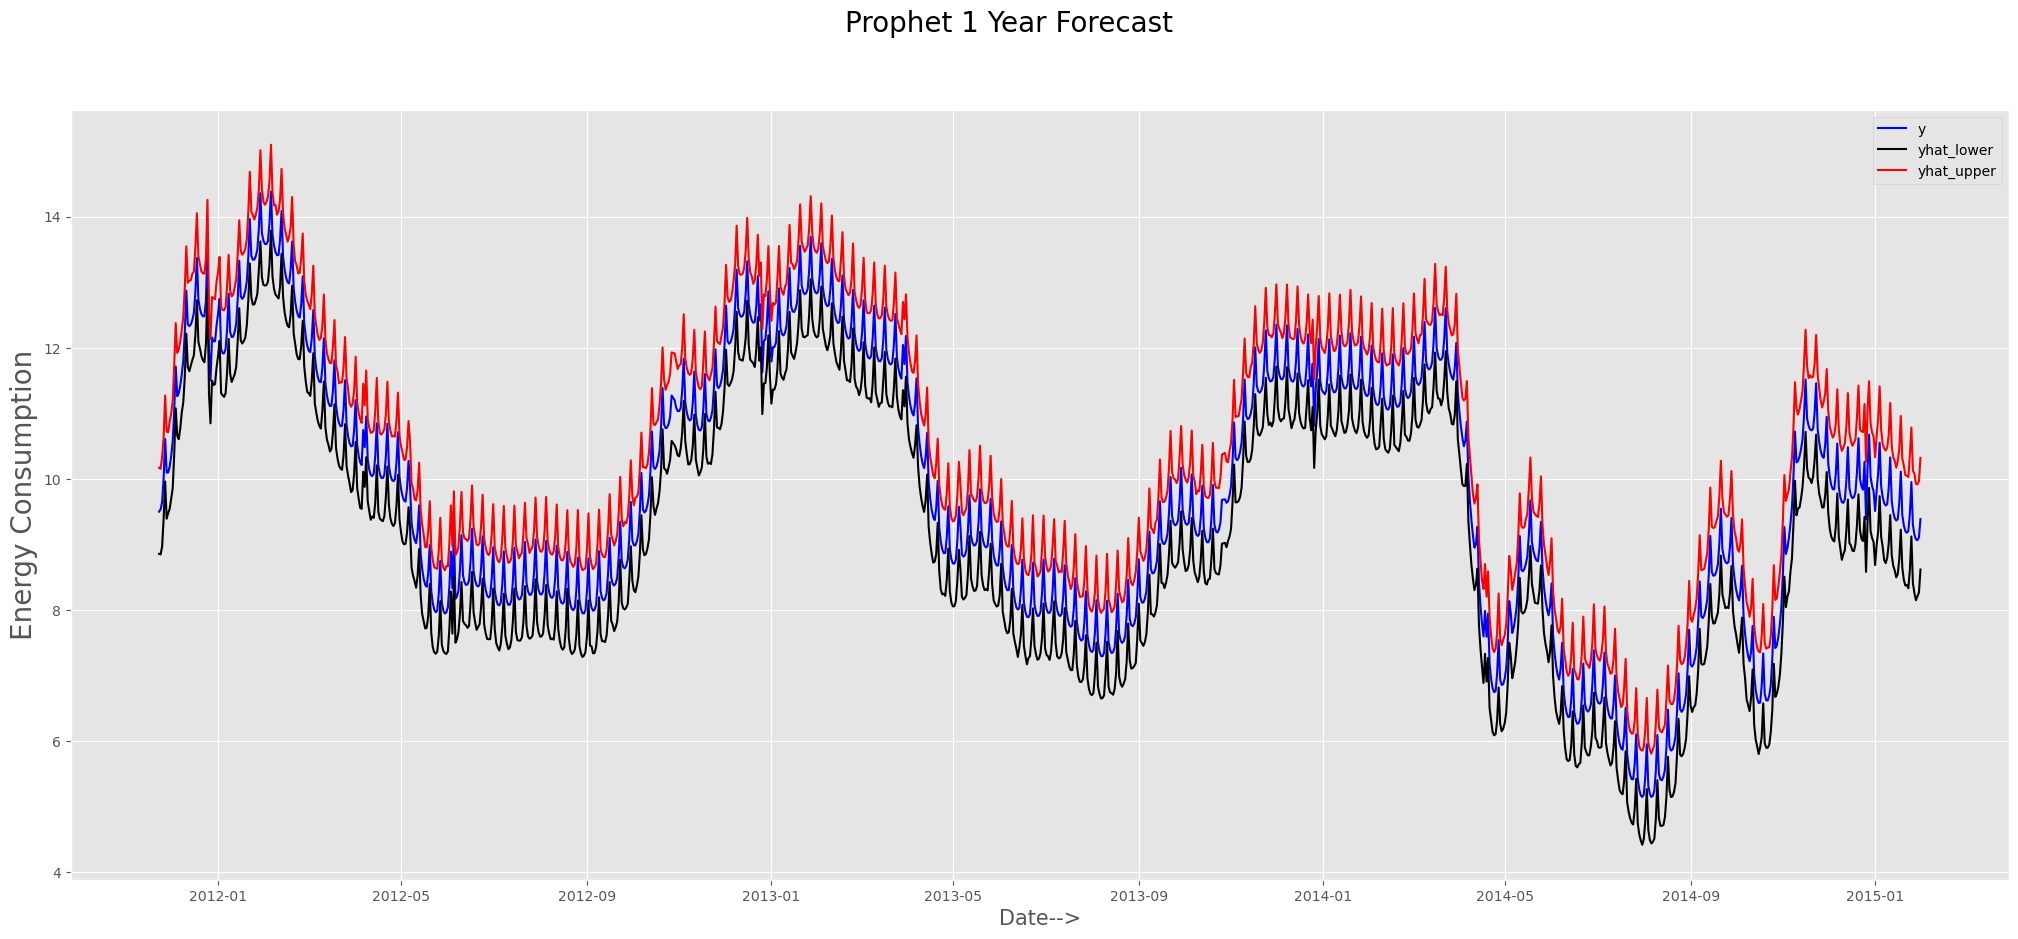

In [46]:
fig, ax1 = plt.subplots(figsize=(25, 10))
ax1.plot(forecast_1yr["ds"], forecast_1yr["yhat"], color="blue")
ax1.plot(forecast_1yr["ds"], forecast_1yr["yhat_lower"], color="black")
ax1.plot(forecast_1yr["ds"], forecast_1yr["yhat_upper"], color="red")
ax1.set_xlabel("Date-->", size=15)
ax1.set_ylabel("Energy Consumption", size=20)

ax1.legend(("y", "yhat_lower", "yhat_upper"))
plt.suptitle("Prophet 1 Year Forecast", fontsize=20)

# Apply LSTM

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [48]:
train = pd.read_csv("../data/final/train.csv")
test = pd.read_csv("../data/final/test.csv")
test.head()

,date,temperatureMax,dewPoint,apparentTemperatureHigh,temperatureMin,temperatureLow,temperatureHigh,uvIndex,month,datetime,avg_energy
0,2014-02-01,9.72,3.18,4.27,4.83,6.24,8.32,1.0,2,798,11.710582
1,2014-02-02,9.30,2.63,6.48,5.79,4.97,9.30,1.0,2,799,12.078164
2,2014-02-03,7.99,2.86,4.59,4.97,4.22,7.99,1.0,2,800,11.280011
3,2014-02-04,8.88,2.69,5.63,4.22,5.54,8.88,1.0,2,801,11.095584
4,2014-02-05,9.64,4.06,5.86,5.54,7.01,9.64,1.0,2,802,11.415105


In [49]:
train.set_index("date", inplace=True)
test.set_index("date", inplace=True)

In [50]:
X_train = train.drop(["avg_energy"], axis=1).iloc[:len(train)-27,:]
X_val = train.drop("avg_energy", axis=1).iloc[len(train)-27:,:]
y_train = train["avg_energy"][:len(train)-27,]
y_val = train["avg_energy"][len(train)-27:,]
X_test = test.drop("avg_energy", axis=1)
y_test = test["avg_energy"]

In [51]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [52]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((771, 9), (771,), (27, 9), (27,), (27, 9), (27,))

In [53]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
#--------------------------------------------
X_val = np.array(X_val)
y_val = np.array(y_val)

In [54]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
#---------------------------------------------------------------------------------
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

In [55]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((771, 1, 9), (771,), (27, 1, 9), (27,))

In [56]:
y_test

array([11.71058193, 12.07816436, 11.28001148, 11.09558444, 11.41510454,
       11.44540333, 10.97231825, 11.56930046, 12.20296743, 11.26417517,
       11.45264931, 11.67909938, 11.28573673, 11.81691433, 11.49046962,
       11.58215903, 10.97956599, 10.78189798, 10.6746236 , 10.5738354 ,
       10.5181265 , 10.77624211, 11.48041076, 10.41140308, 10.2949966 ,
       10.20294532, 10.3563499 ])

## LSTM model creation

In [57]:
# X_test = tf.keras.utils.normalize(X_test, axis=1)
# X_train = tf.keras.utils.normalize(X_train, axis=1)

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 10.1064 - val_loss: 9.9119
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7262 - val_loss: 0.3573
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6155 - val_loss: 4.5546
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5906 - val_loss: 4.8517
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4261 - val_loss: 3.7338
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2341 - val_loss: 2.4297
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1720 - val_loss: 2.3507
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9738 - val_loss: 1.2337
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9189 - val_loss: 1.1100
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9083 - val_loss: 0.5487
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8841 - val_loss: 0.3414
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6834 - val_loss: 1.9616
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6377 - val_loss: 1.9185
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.6725 - val_loss: 1.8045
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6848 - val_loss: 2.2896
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7538 - val_loss: 1.7066
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6599 - val_loss: 2.0409
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7214 - val_loss: 1.6157
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7173 - val_loss: 2.3975
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6930 - val_loss: 1.8921
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7298 - val_loss: 2.4250
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7282 - val_loss: 1.5365
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6925

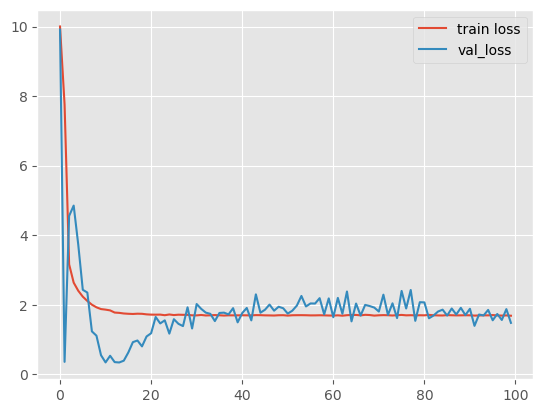

In [59]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))  

model.add(LSTM(100, return_sequences=True))

model.add(Dropout(0.2))
model.add(Dense(10, activation="linear"))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
es = EarlyStopping(monitor='log_loss', mode='min', verbose=4)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[es])

# Plot history (including validation loss)
pyplot.plot(history.history['loss'], label='train loss')
pyplot.plot(history.history['val_loss'], label='val_loss')
pyplot.legend()
pyplot.show()

In [60]:
y_test_pred = model.predict(X_test)
y_test_pred_rnn = np.reshape(y_test_pred, (y_test_pred.shape[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


In [61]:
y_test_pred.shape

(27, 1, 1)

In [62]:
out_df["LSTM"] = y_test_pred_rnn

### Accuracy score

In [63]:
accuracy_lstm = accuracy_function(y_test, y_test_pred_rnn)
accuracy_lstm = round(accuracy_lstm*100, 3)
print("Accuracy Score for LSTM: ", accuracy_lstm, "%")
accuracy_df.loc[len(accuracy_df)] = {'model': 'lstm', 'accuracy': accuracy_lstm}

Accuracy Score for LSTM:  70.37 %


In [64]:
accuracy_df.head()

,model,accuracy
0,prophet,62.963
1,lstm,70.370


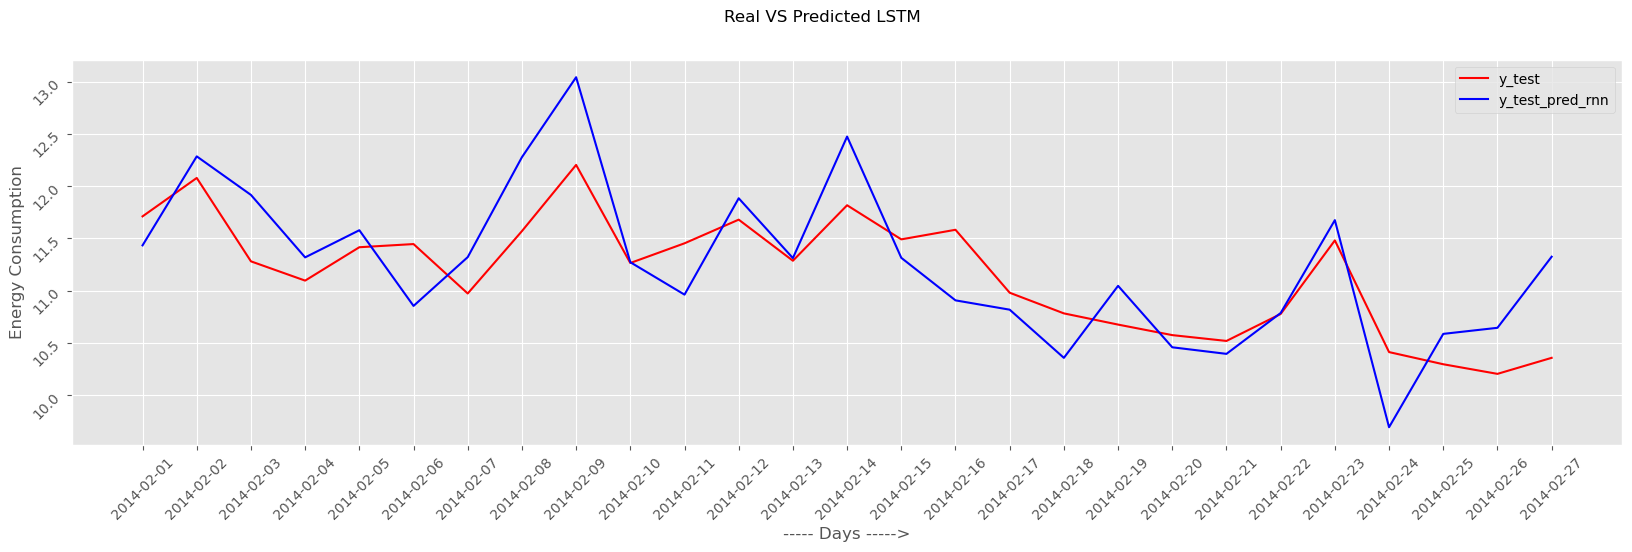

In [108]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(y_test, color="red", label = 'prediction')
ax1.plot(y_test_pred_rnn, color="blue")
ax1.legend(("y_test", "y_test_pred_rnn"))
ax1.set_ylabel("Energy Consumption")
ax1.set_xlabel("----- Days ----->")
ax1.tick_params(rotation=45)
plt.suptitle("Real VS Predicted LSTM")
plt.show()

### mean squared error

In [66]:
# trainScore = mean_squared_error(y_train, y_train_pred_rnn)
# print('Train Score: %.2f MSE' % (0.20))
mse_lstm = mean_squared_error(y_test, y_test_pred_rnn)
print('Test Score: %.2f MSE' % (mse_lstm))

Test Score: 0.21 MSE


### Mean absolute error

In [67]:
# trainScore = mean_absolute_error(y_train, y_train_pred_rnn)
# print("trainScore : %.2f MAE" % (0.34))
mae_lstm = mean_absolute_error(y_test, y_test_pred_rnn)
print("testScore : %.2f MAE" % (mae_lstm))

testScore : 0.37 MAE


### Mean absolute percentage error

In [68]:
mape_lstm = mean_absolute_percentage_error(y_test, y_test_pred_rnn)
print("testScore : %.2f MAPE" % (mape_lstm))

testScore : 0.03 MAPE


In [69]:
error_df.loc[len(error_df)] = {'model': 'LSTM', 'mae': mae_lstm, 'rmse': np.sqrt(mse_lstm), 'mape': mape_lstm}

# Using XGBOOST

In [70]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [103]:
train = pd.read_csv("../data/final/train.csv")
test = pd.read_csv("../data/final/test.csv")
train.head()

,date,temperatureMax,dewPoint,apparentTemperatureHigh,temperatureMin,temperatureLow,temperatureHigh,uvIndex,month,datetime,avg_energy
0,2011-11-23,10.36,6.29,10.36,3.81,8.24,10.36,1.0,11,0,6.952692
1,2011-11-24,12.93,8.56,12.93,8.56,9.71,12.93,1.0,11,1,8.536480
2,2011-11-25,13.03,7.24,12.27,7.46,7.01,12.27,1.0,11,2,9.499781
3,2011-11-26,12.96,6.96,12.96,7.01,11.59,12.96,1.0,11,3,10.267707
4,2011-11-27,13.54,5.76,13.54,4.47,1.31,13.54,1.0,11,4,10.850805


In [104]:
train.set_index("date", inplace=True)
test.set_index("date", inplace=True)
X_train = train.drop("avg_energy", axis=1)
y_train = train["avg_energy"]
X_test = test.drop("avg_energy", axis=1)
y_test = test["avg_energy"]

In [105]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((798, 9), (27, 9), (798,), (27,))

##  Instantiation of an XGBoost Regressor

In [74]:
xg_model = xgb.XGBRegressor(n_estimators=1000, learning_rate = 0.02, max_depth=3)

In [75]:

xg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

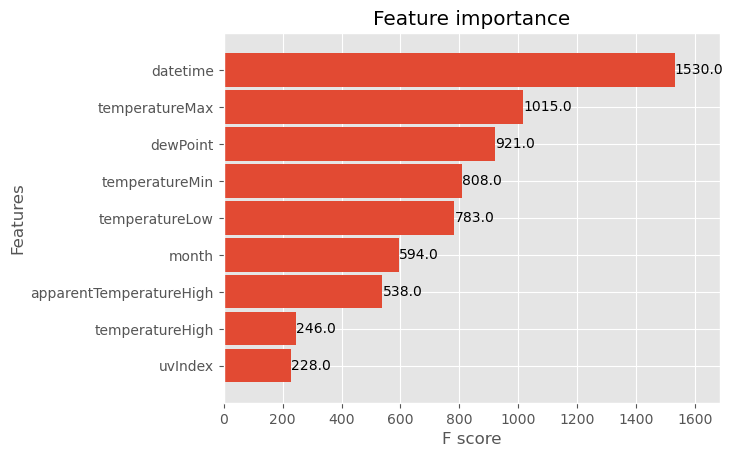

In [76]:
xgb.plot_importance(xg_model, height=0.9)

# Forecast on Test Set

In [77]:
y_train_pred_xg = xg_model.predict(X_train)

In [78]:
y_test_pred_xg = xg_model.predict(X_test)

In [79]:
out_df["xg"] = y_test_pred_xg

### Accuracy Score

In [80]:
accuracy_xg = accuracy_function(y_test, y_test_pred_xg)
accuracy_xg = round(accuracy_xg*100, 3)
print("Accuracy Score for XGBoost: ", accuracy_xg, "%")
accuracy_df.loc[len(accuracy_df)] = {'model': 'xgBoost', 'accuracy': accuracy_xg}

Accuracy Score for XGBoost:  66.667 %


In [81]:
accuracy_df.head()

,model,accuracy
0,prophet,62.963
1,lstm,70.370
2,xgBoost,66.667


## Mean squared error

In [82]:
mse_xg = mean_squared_error(y_test, y_test_pred_xg)
print('Test Score: %.2f MSE' % (mse_xg))

Test Score: 0.33 MSE


## Mean absolute error

In [83]:
mae_xg = mean_absolute_error(y_test, y_test_pred_xg)
print('Test Score: %.2f MAE' % (mae_xg))

Test Score: 0.46 MAE


### Mean absolute percentage error

In [84]:
mape_xg = mean_absolute_percentage_error(y_test, y_test_pred_xg)
print('Test Score: %.2f MAPE' % (mape_xg))

Test Score: 0.04 MAPE


In [85]:
error_df.loc[len(error_df)] = {'model': 'XGBoost', 'mae': mae_xg, 'rmse': np.sqrt(mse_xg), 'mape': mape_xg}

#### Real VS Forecast

Text(0.5, 0.98, 'Real VS Forecast XG')

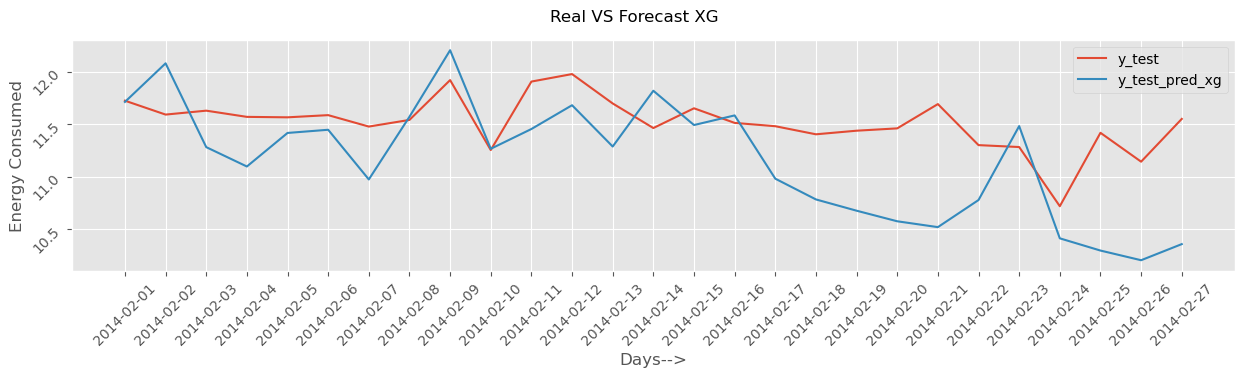

In [106]:
fig, ax1 = plt.subplots(figsize=(15,3))
ax1.plot(y_test_pred_xg, label='data')
ax1.plot(y_test, label='prediction')
ax1.set_xlabel('Days-->')
ax1.set_ylabel('Energy Consumed')
ax1.legend(("y_test", "y_test_pred_xg"))
ax1.tick_params(rotation=45)
plt.suptitle('Real VS Forecast XG')
# plt.legend()


# MEAN OF ALL OUTPUT

In [87]:
out_df.head()

,prophet,LSTM,xg
0,11.556175,11.432925,11.722393
1,12.033680,12.284779,11.590014
2,11.378108,11.915824,11.627354
3,11.224855,11.317993,11.568257
4,11.144751,11.577818,11.563897


In [88]:
def final_output(df):
    y_out_pred = df.mean(axis=1)
    return y_out_pred

y_out_pred = final_output(out_df)
y_out_pred.head()

0    11.570498
1    11.969491
2    11.640429
3    11.370369
4    11.428822
dtype: float64

In [89]:
test = pd.read_csv("../data/final/test.csv")
y_test = test["avg_energy"]

In [90]:
y_test.shape, y_out_pred.shape

((27,), (27,))

### Accuracy Score

In [91]:
accuracy_combined = accuracy_function(y_test, y_out_pred)
accuracy_combined = round(accuracy_combined*100, 3)
print("Accuracy Score for Combined: ", accuracy_combined, "%")
accuracy_df.loc[len(accuracy_df)] = {'model': 'Ensemble', 'accuracy': accuracy_combined}

Accuracy Score for Combined:  81.481 %


### Mean Squared Error

In [92]:
com_mse = mean_squared_error(y_test, y_out_pred)
print('Test Score: %.2f MSE' % (com_mse))

Test Score: 0.15 MSE


### Mean Absolute Error

In [93]:
com_mae = mean_absolute_error(y_test, y_out_pred)
print('Test Score: %.2f MSE' % (com_mae))

Test Score: 0.28 MSE


### Mean Absolute Percentage Error

In [94]:
com_mape = mean_absolute_percentage_error(y_test, y_out_pred)
print('Test Score: %.2f MSE' % (com_mape))

Test Score: 0.03 MSE


In [95]:
error_df.loc[len(error_df)] = {'model': 'Ensemble', 'mae': com_mae, 'rmse': np.sqrt(com_mse), 'mape': com_mape}

### Real VS Predicted Combined

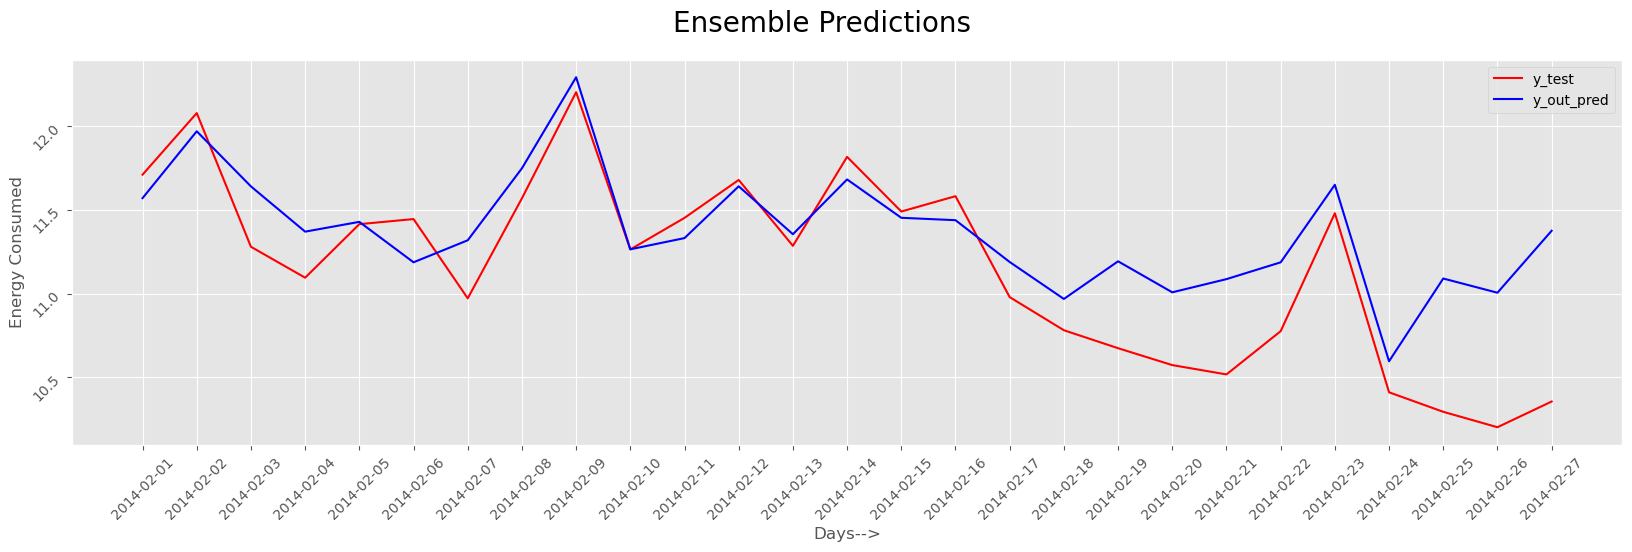

In [107]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(y_test, color="red", label = 'prediction')
ax1.plot(y_out_pred, color="blue", label = 'data')
ax1.tick_params(rotation=45)
ax1.legend(("y_test", "y_out_pred"))
ax1.set_xlabel('Days-->')
ax1.set_ylabel('Energy Consumed')
plt.suptitle("Ensemble Predictions", fontsize=20)
plt.show()

In [97]:
error_df.head()

,model,mae,rmse,mape
0,prophet,0.417952,0.514210,0.038420
1,LSTM,0.372300,0.456462,0.033374
2,XGBoost,0.459328,0.574614,0.042408
3,Ensemble,0.282133,0.381712,0.026229


In [98]:
accuracy_df.head()

,model,accuracy
0,prophet,62.963
1,lstm,70.370
2,xgBoost,66.667
3,Ensemble,81.481


In [99]:
! python --version

Python 3.11.5
